### MODEL DESIGNING

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2 as cv
import os
import PIL
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
pict_size=36
data_dir="./train/"
Type=['FAKE','REAL']
val={'FAKE':0,'REAL':1}
final={0:'FAKE',1:'REAL'}

In [3]:
X_Train=pd.read_pickle('X.pickle')
Y_Train=pd.read_pickle('Y.pickle')

In [40]:
model=models.Sequential([
        layers.Conv2D(filters=80,kernel_size=(3,3),padding='same',activation='relu',input_shape=(36,36,3)),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.2)),
        layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.2)),
        layers.Conv2D(filters=40,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.1)),
        layers.Conv2D(filters=20,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.1)),
        
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(48,activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 36, 36, 80)     │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 18, 18, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 18, 18, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 64)     │        46,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 9, 9, 40)       │        23,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 20)       │         7,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 2, 2, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,037 (339.99 KB)

 Trainable params: 87,037 (339.99 KB)

 Non-trainable params: 0 (0.00 B)

###### FILTERS HELP IN EXTRACTING FEATURES FROM THE IMAGES AND THEIR SIZE IS DENOTED BY KERNEL SIZE.
###### STRIDE IS FOR SHIFTING OUR KERNEL BY HOW MANY POSITIONS.
###### MAXPOOLING 2D HELPS IN SIZE REDUCTION USING MAX 
###### PADDING HELPS IN CAPTURING THE FEATURES LOCATED AT EDGES AND CORNERS AND ENFORCES THEIR CONTRIBUTION.


In [42]:
model.fit(X_Train,Y_Train,epochs=10)

In [6]:
model.save("Model.h5")

In [7]:
data_test_dir="./test/"
Testing_data=[]
lis=[]
for categ in Type:
    Files=os.listdir(data_test_dir+categ+"/")
    i=1
    for file in Files:
        imgpath=os.path.join(data_test_dir+categ+"/",file)
        lis.append(imgpath)
        image=cv.imread(imgpath)
        img=cv.imread(str(lis[-1]))
        try:
            new_img=cv.resize(img,(pict_size,pict_size))
            new_img=new_img/255
            Testing_data.append([new_img,val[categ]])
        except:
            print("Not able to preprocess")
        i=i+1

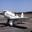

In [8]:
PIL.Image.open(str(lis[-1]))

In [9]:
X_Test=[]
Y_Test=[]
for i in range(0,len(Testing_data)):
    X_Test.append(Testing_data[i][0])
    Y_Test.append(Testing_data[i][1])
X_Test=np.array(X_Test)
Y_Test=np.array(Y_Test)
print(X_Test.shape)
print(Y_Test.shape)
y_pred=model.predict(X_Test)

(20000, 36, 36, 3)
(20000,)
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step


In [10]:
Y_Pred=[]
for i in range(len(y_pred)):
    y_hat=np.argmax(y_pred[i])
    Y_Pred.append(y_hat)

In [11]:
print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10000
           1       0.93      0.95      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [ ]:

lis=[]
Test=[]
data_test_dir="./Testing/"
Files=os.listdir(data_test_dir)
i=1
for file in Files:
    imgpath=os.path.join(data_test_dir,file)
    lis.append(imgpath)
    image=cv.imread(imgpath)
    img=cv.imread(str(lis[-1]))
    try:
        new_img=cv.resize(img,(36,36))
        new_img=new_img/255
        Test.append(new_img)
    except:
        print("Not able to preprocess")
    # print(i)
    i=i+1

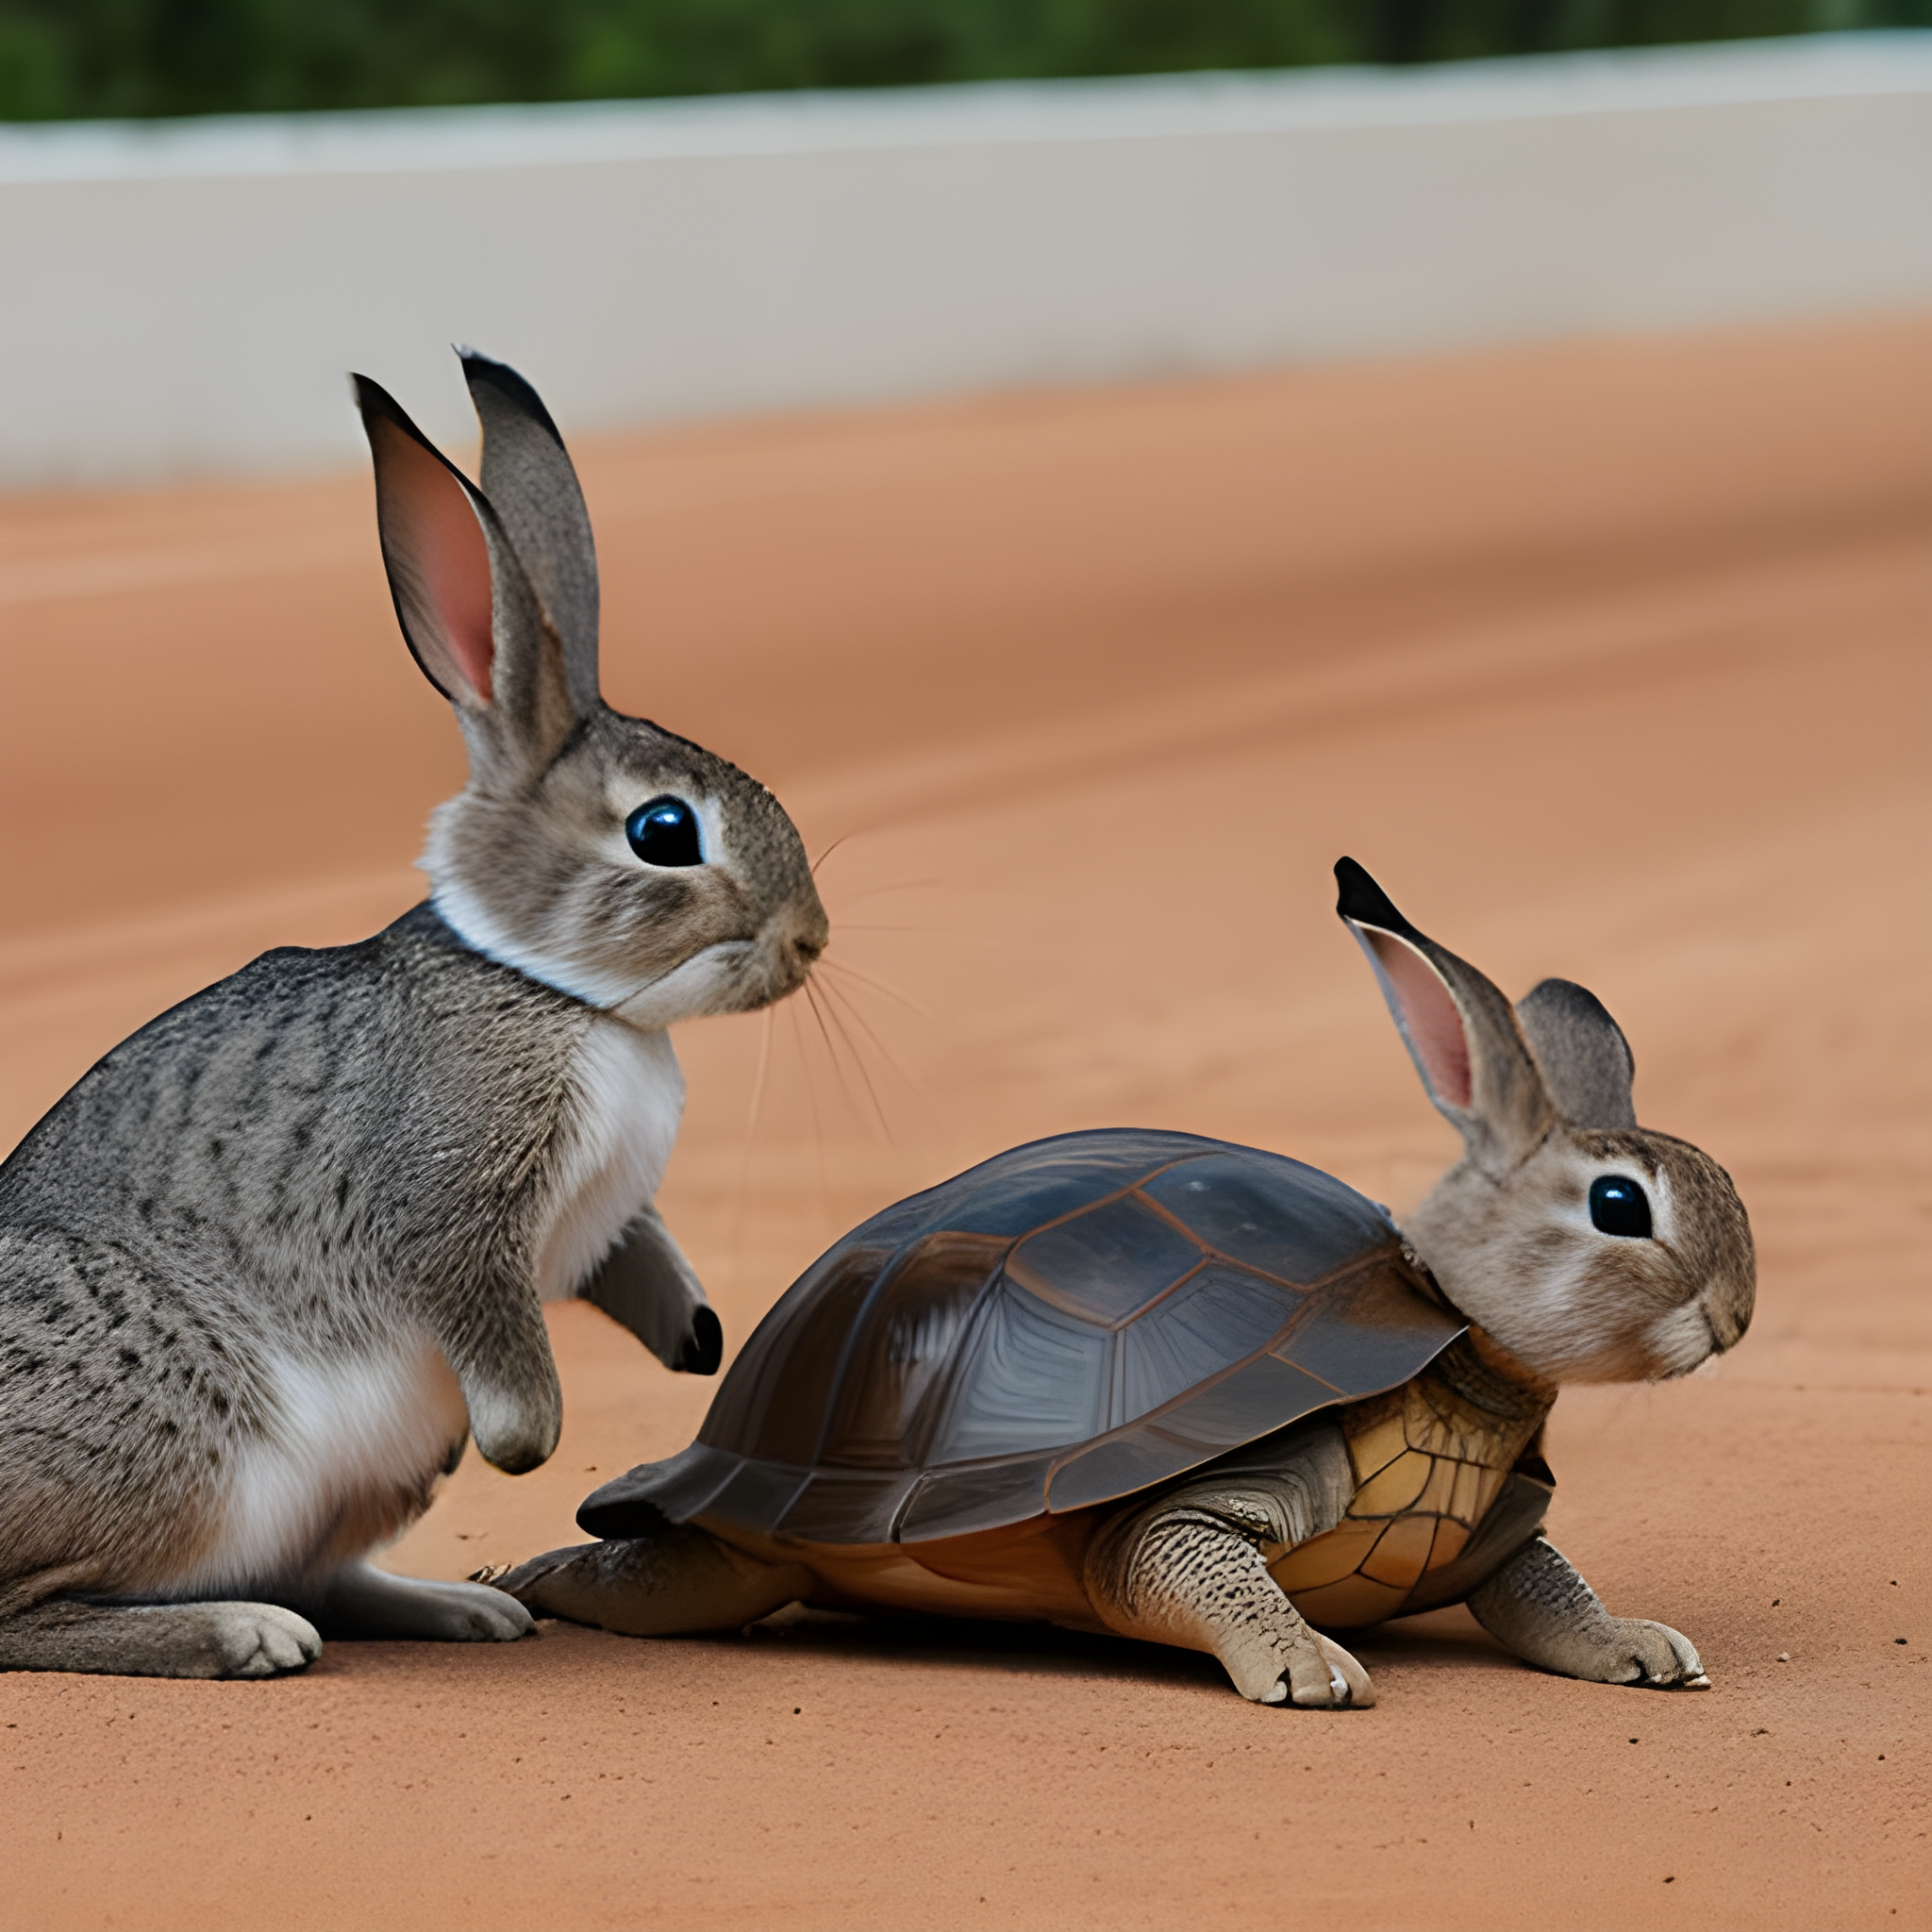

In [13]:
PIL.Image.open(str(lis[-1]))

In [34]:
y_pred=model.predict(np.array(Test))
y_hat=np.argmax(y_pred[0])
print(final[y_hat])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
FAKE
